# Analyzing exam scores

Now let's now move on to the competition and challenge.

## 📖 Background
Your best friend is an administrator at a large school. The school makes every student take year-end math, reading, and writing exams.

Since you have recently learned data manipulation and visualization, you suggest helping your friend analyze the score results. The school's principal wants to know if test preparation courses are helpful. She also wants to explore the effect of parental education level on test scores. 

## 💾 The data

#### The file has the following fields ([source](http://roycekimmons.com/tools/generated_data/exams)):
- "gender" - male / female
- "race/ethnicity" - one of 5 combinations of race/ethnicity
- "parent_education_level" -  highest education level of either parent
- "lunch" - whether the student receives free/reduced or standard lunch
- "test_prep_course" - whether the student took the test preparation course
- "math" -  exam score in math 
- "reading" -  exam score in reading 
- "writing" -  exam score in writing 

In [7]:
# importing libralies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# read data
df = pd.read_csv('./data/exams.csv')
df.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
# check size of data
print('Data Shape')
display(df.shape)
print()

# check null value
print('Counts of Null Values')
display(df.isnull().sum())
print()

# check data types
print('Checking Data Types')
display(df.dtypes)


Data Shape


(1000, 8)


Counts of Null Values


gender                    0
race/ethnicity            0
parent_education_level    0
lunch                     0
test_prep_course          0
math                      0
reading                   0
writing                   0
dtype: int64


Checking Data Types


gender                    object
race/ethnicity            object
parent_education_level    object
lunch                     object
test_prep_course          object
math                       int64
reading                    int64
writing                    int64
dtype: object

## Questions 

### 1. What are the average reading scores for students with/without the test preparation course? (visualiztion)

In [10]:
def groupping(col, data=df):
    grouped = df.groupby(col)
    return grouped

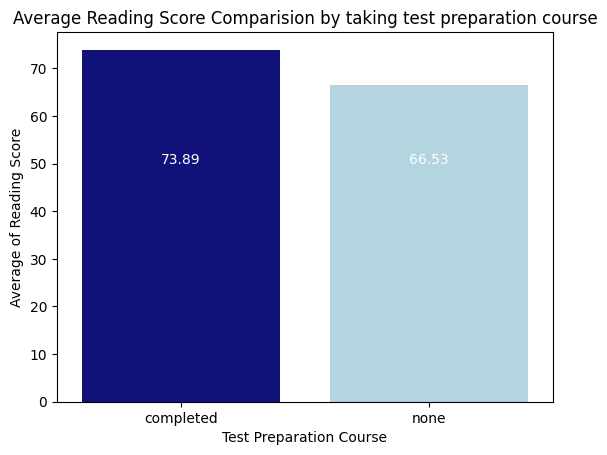

In [11]:
df.test_prep_course.unique()
colors = {'completed':'darkblue','none':'lightblue'}
test_grouped = groupping('test_prep_course')
avg_r = test_grouped['reading'].mean().reset_index()
ax = sns.barplot(x='test_prep_course', y='reading', data= avg_r, palette=colors)
for index,row in avg_r.iterrows():
    ax.text(row.name, 50, round(row.reading,2),color='white', ha='center')
ax.set_xlabel('Test Preparation Course')
ax.set_ylabel('Average of Reading Score')
ax.set_title('Average Reading Score Comparision by taking test preparation course')
plt.show()

### 2. What are the average scores for the different parental education levels?(visualization)

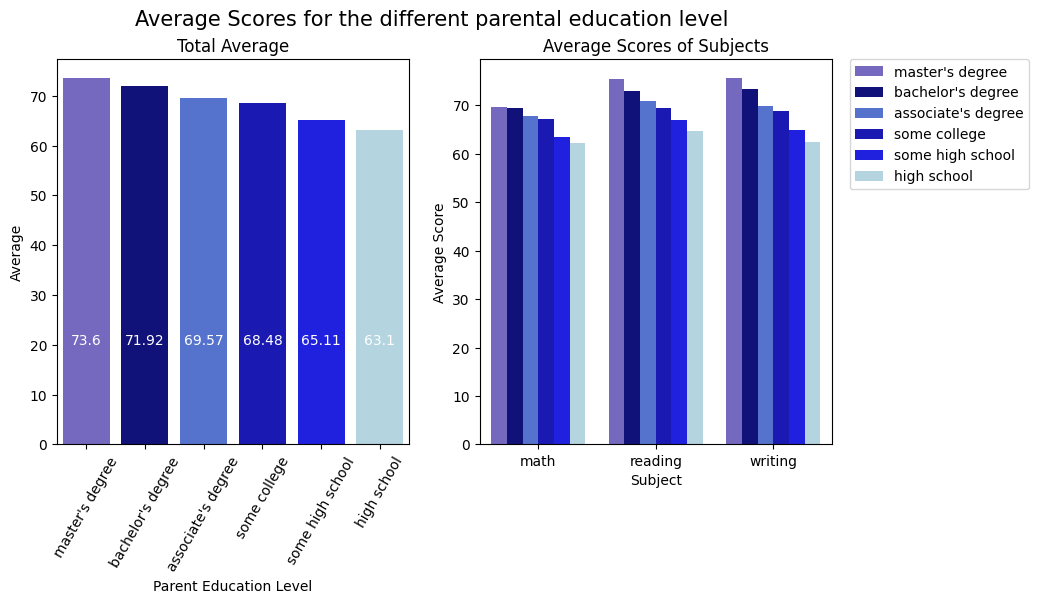

In [13]:
hue_color={"bachelor's degree":'darkblue', 'some college':'mediumblue', "master's degree":'slateblue',
       "associate's degree":'royalblue', 'high school':'lightblue', 'some high school':'blue'}
parent_group = groupping('parent_education_level')
parent_edu = parent_group[['math','reading','writing']].mean()
# editting data for 1st graph , mean of math, reading and writing score for each parental education level
parent_edu = parent_edu.assign(total_mean=parent_edu.mean(axis=1)).sort_values(['total_mean'], ascending=False)
# editting data for 2nd graph, melting the data 
melting = parent_edu.drop('total_mean', axis=1).reset_index()
melted = melting.melt('parent_education_level',var_name='subjet', value_name='mean_score')

# Making plots
# 1st plot (total mean score)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
plt.suptitle('Average Scores for the different parental education level',size=15)
ax1 = sns.barplot(data=parent_edu, x=parent_edu.index, y='total_mean',palette=hue_color, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 60)
ax1.set(xlabel='Parent Education Level', ylabel='Average', title='Total Average')
for i, v in enumerate(parent_edu['total_mean'].iteritems()):
    ax1.text(i, 20, round(v[1],2), color='white', ha='center')
    
# 2nd plot(each exam average score)
ax2 = sns.barplot(y='mean_score', x='subjet', data=melted, hue='parent_education_level',palette=hue_color, ax=ax2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # put legend outside of plot
ax2.set(xlabel='Subject', ylabel='Average Score', title='Average Scores of Subjects')
plt.show()

### 3. Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).

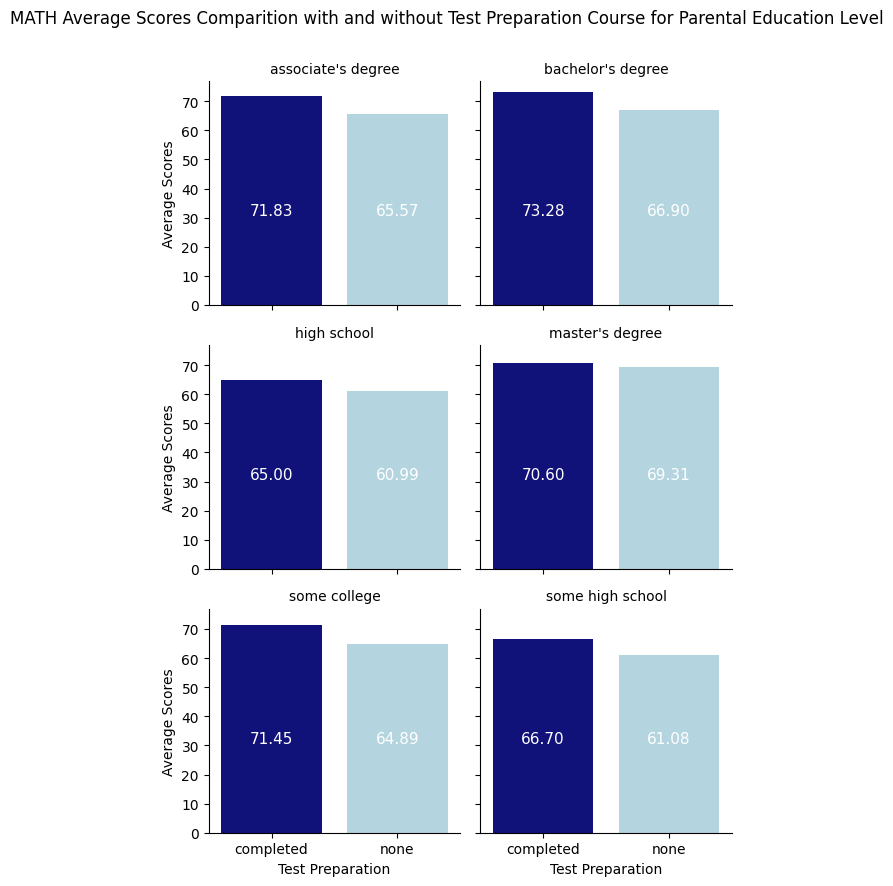

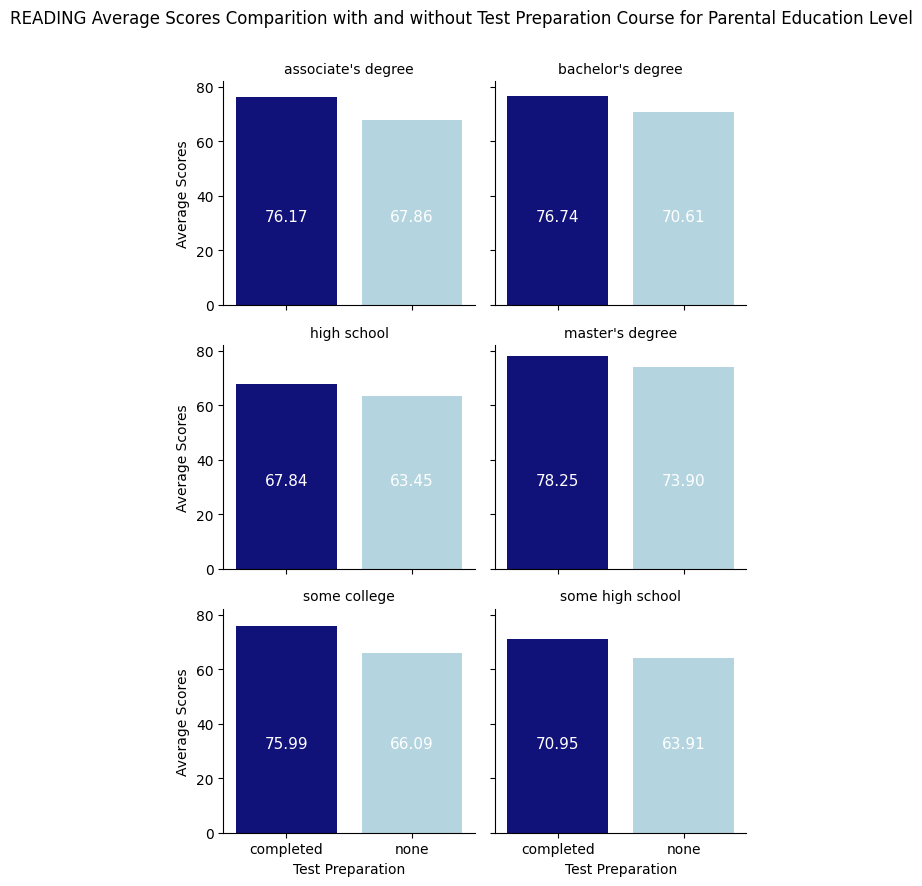

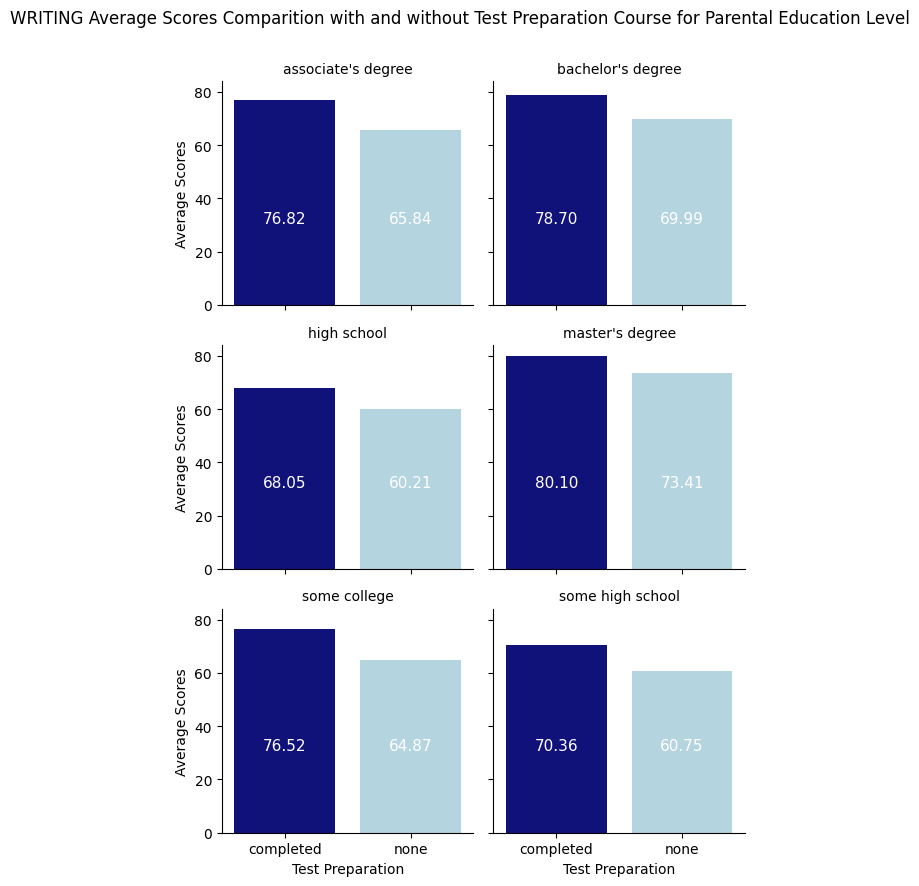

In [14]:
facet_group = groupping(['parent_education_level','test_prep_course'])
subjects = ['math','reading','writing']
f_group = facet_group[subjects].mean().reset_index()
f_group
for sub in subjects:
    g = sns.FacetGrid(f_group, col = 'parent_education_level',col_wrap=2)
    g.map_dataframe(sns.barplot, x='test_prep_course', y= sub ,palette=colors)
    g.set_axis_labels("Test Preparation", "Average Scores")
    g.fig.subplots_adjust(top=0.9) 
    g.fig.suptitle(sub.upper() +' '+'Average Scores Comparition with and without Test Preparation Course for Parental Education Level')
    g.set_titles(col_template = '{col_name}')
    for ax in g.axes:
        for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., 30),
                 ha='center', va='center', fontsize=11, color='white', xytext=(0, 5),
                 textcoords='offset points')

### 4. The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores.

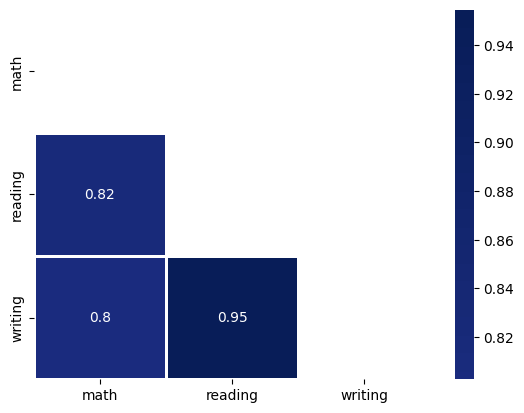

In [16]:
corrmat = df.corr()
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat, mask = mask, center = 0, linewidths = 1, annot = True, cmap='YlGnBu')
plt.show()

### Summary

1. <font color=blue> Students who completed test preparation course had higher average reading scores than those who didn't take test preparation course. </font>  
- The gap of average reading scores was about 7point, 73.89 and 66.53 respectively for with or without taking test preparation course.  
2. <font color=blue> Students whose parents have higher level of education level had higher average scores. </font>  
- The highest average scores were students whose parents got master's degrees and the least average scores were  students whose parents graduated in high school.
- This aspect was not only for total average but also each subject. 
3. <font color=blue> With test preparation course, Students had higher average scores in every subject regardless of their parents education level.</font>  
- Reading and writing had wider gap between with or without taking test preparation course than math. </font>
4. <font color=blue> It is highly possible that a kid who has good score on one subject perform well on the others.</font>  
- Each subject score has strong positive correlation over 0.8, especially, reading and writing have 0.95.
